In [1]:
import pandas as pd
import numpy as np
from openpyxl.workbook import Workbook as wb
from openpyxl import load_workbook
from openpyxl.styles import Font
from openpyxl.utils.dataframe import dataframe_to_rows
import scipy
from scipy.stats.stats import pearsonr
import scipy.stats
import scipy.optimize
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [4]:
#dataframe I queried for with all the individual hitting metrics such as exit velos over 95
df = pd.read_excel('mlbTotalsToHitting2019.xlsx')
df.columns

Index(['Team', 'AVG', 'OBP', 'SLG', 'OPS', 'Spd', 'K/9', 'HR/9', 'K%', 'AVG.1',
       'WHIP', 'SIERA', 'W', 'L', 'PCT', 'HOME', 'AWAY', 'RS', 'RA', 'DIFF',
       'Exp Win pct', 'attempts', 'avg_hit_angle', 'anglesweetspotpercent',
       'max_hit_speed', 'avg_hit_speed', 'fbld', 'gb', 'max_distance',
       'avg_distance', 'avg_hr_distance', 'ev95plus', 'ev95percent', 'barrels',
       'brl_percent', 'brl_pa'],
      dtype='object')

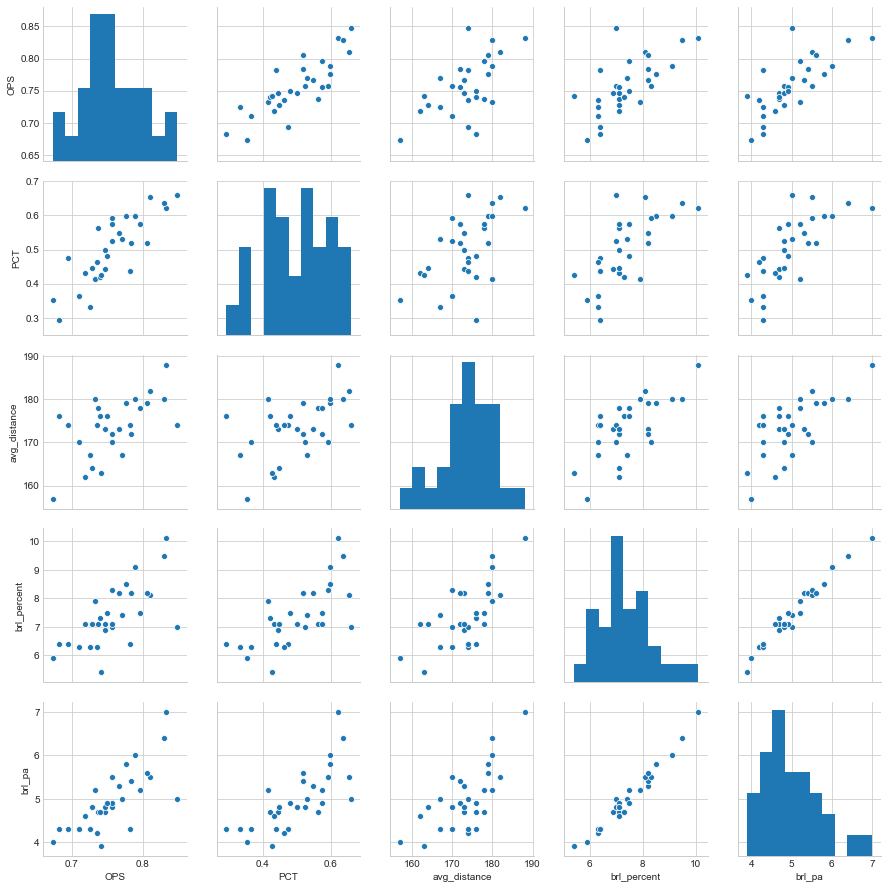

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')
X = df[['OPS','PCT','avg_distance','brl_percent','brl_pa']]
sb.pairplot(X)

In [11]:
#correlation
Y = df[['PCT','OPS', 'OBP', 'AVG','avg_hit_angle','anglesweetspotpercent',
       'max_hit_speed', 'avg_hit_speed', 'fbld', 'gb', 'max_distance',
       'avg_distance', 'avg_hr_distance', 'ev95plus', 'ev95percent', 'barrels',
       'brl_percent', 'brl_pa']]
corr = Y.corr()
corr

,PCT,OPS,OBP,AVG,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa
PCT,1.000000,0.827814,0.846860,0.573177,0.342319,0.249434,0.238379,0.547645,0.642693,0.303834,0.107047,0.527833,-0.047516,0.644453,0.587975,0.760346,0.695860,0.741186
OPS,0.827814,1.000000,0.960693,0.797255,0.377951,0.390240,0.279053,0.557183,0.588819,0.338822,0.191771,0.588260,-0.002078,0.676188,0.526103,0.786234,0.682198,0.749445
OBP,0.846860,0.960693,1.000000,0.804886,0.264709,0.318237,0.203070,0.482333,0.519517,0.282115,0.152099,0.484868,0.032291,0.642695,0.466331,0.706887,0.591695,0.660879
AVG,0.573177,0.797255,0.804886,1.000000,0.026436,0.355175,0.209415,0.430913,0.378942,0.308057,0.261672,0.250361,0.160842,0.689446,0.400570,0.517345,0.352701,0.469352
avg_hit_angle,0.342319,0.377951,0.264709,0.026436,1.000000,0.606254,-0.063319,0.154418,0.184151,-0.072477,-0.219658,0.897633,-0.385536,0.155824,0.168798,0.470714,0.464199,0.475121
anglesweetspotpercent,0.249434,0.390240,0.318237,0.355175,0.606254,1.000000,0.025784,0.089044,0.092269,-0.162580,0.167976,0.707969,-0.071939,0.243309,0.151710,0.423622,0.378386,0.391646
max_hit_speed,0.238379,0.279053,0.203070,0.209415,-0.063319,0.025784,1.000000,0.356401,0.296671,0.469458,0.231927,0.000147,-0.079176,0.172046,0.233722,0.296352,0.315618,0.313106
avg_hit_speed,0.547645,0.557183,0.482333,0.430913,0.154418,0.089044,0.356401,1.000000,0.906717,0.901859,0.124823,0.360180,0.036250,0.837300,0.933654,0.790825,0.794005,0.800187
fbld,0.642693,0.588819,0.519517,0.378942,0.184151,0.092269,0.296671,0.906717,1.000000,0.694965,0.190250,0.427764,0.105289,0.785501,0.923587,0.828908,0.856089,0.845406
gb,0.303834,0.338822,0.282115,0.308057,-0.072477,-0.162580,0.469458,0.901859,0.694965,1.000000,0.059907,0.041862,-0.032097,0.688791,0.772255,0.523100,0.523350,0.534072


In [38]:
sigCorr = corr[corr>.6]
sigCorr.fillna(value='|||||||||||||',inplace=True)
sigCorr.drop(['avg_hr_distance','max_hit_speed','max_distance','gb'], axis=1)

,PCT,OPS,OBP,AVG,avg_hit_angle,anglesweetspotpercent,avg_hit_speed,fbld,avg_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa
PCT,1,0.827814,0.84686,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,0.642693,|||||||||||||,0.644453,|||||||||||||,0.760346,0.69586,0.741186
OPS,0.827814,1,0.960693,0.797255,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,0.676188,|||||||||||||,0.786234,0.682198,0.749445
OBP,0.84686,0.960693,1,0.804886,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,0.642695,|||||||||||||,0.706887,|||||||||||||,0.660879
AVG,|||||||||||||,0.797255,0.804886,1,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,0.689446,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||
avg_hit_angle,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,1,0.606254,|||||||||||||,|||||||||||||,0.897633,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||
anglesweetspotpercent,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,0.606254,1,|||||||||||||,|||||||||||||,0.707969,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||
max_hit_speed,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||
avg_hit_speed,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,1,0.906717,|||||||||||||,0.8373,0.933654,0.790825,0.794005,0.800187
fbld,0.642693,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,0.906717,1,|||||||||||||,0.785501,0.923587,0.828908,0.856089,0.845406
gb,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,|||||||||||||,0.901859,0.694965,|||||||||||||,0.688791,0.772255,|||||||||||||,|||||||||||||,|||||||||||||


In [45]:
#finding multiple regression to OPS 
y = df['OPS'].values
x = df[['brl_pa','avg_hit_speed','ev95plus']] 
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

Intercept: 
 2.5512988040813793
Coefficients: 
 [ 0.04567638 -0.02642888  0.00020141]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              6799.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):                    5.84e-39
Time:                        22:13:15   Log-Likelihood:                          65.156
No. Observations:                  30   AIC:                                     -124.3
Df Residuals:                      27   BIC:                                     -120.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std er

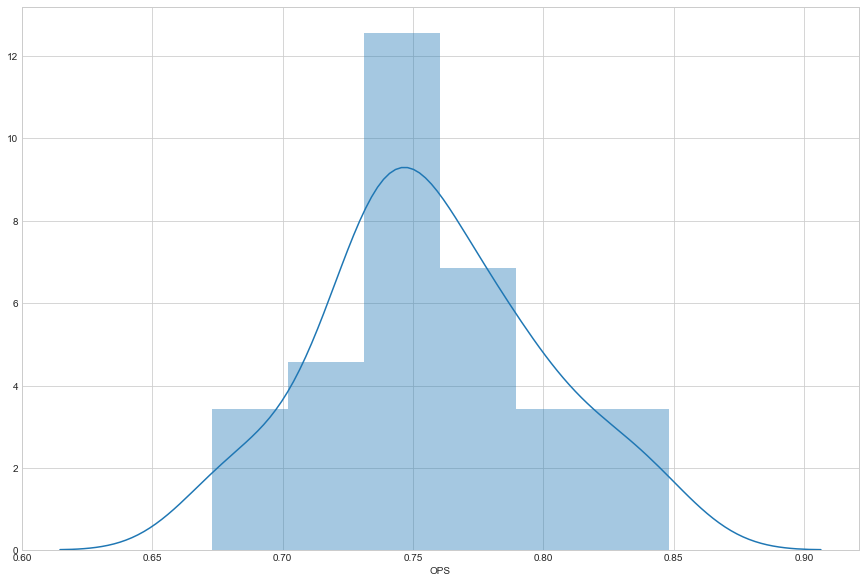

In [47]:
#labeling all of my independent and dependent variables for multiple regression on OPS (dep variable)
x = df[['avg_hit_angle','anglesweetspotpercent',
       'max_hit_speed', 'avg_hit_speed', 'fbld', 'gb', 'max_distance',
       'avg_distance', 'avg_hr_distance', 'ev95plus', 'ev95percent', 'barrels',
       'brl_percent', 'brl_pa']].values
y = df['OPS'].values
#to see the average value of win percentage
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(df['OPS'])